# Description

This Jupyter Notebook contains the code required to load and process an example dataset with the [R<sub>0</sub>](https://cran.r-project.org/web/packages/R0/index.html) package for R.

This notebook is intended to be run in [Google Colab](https://colab.research.google.com) with an R kernel.

In [1]:
install.packages("R0", quiet=TRUE) # Install R0 package
library(R0) # Load R0 package

Loading required package: MASS



In [7]:
# Load dataset as a named vector
incid <- read.table("/cases_averaged.csv", header=T, sep = ",")
incid <- setNames(incid$x, row.names(incid))

# Clean Data
first_case_index <- match(incid[incid>0][1], incid) # Find first date that the number of cases was >0
incid <- round(incid[-(1:first_case_index-1)]) # Remove entries before first case
incid <- round(incid) # Round case numbers to the nearest unit

# Use a not-too-bad generation time
mGT <- generation.time("gamma", val = c(5, 10))

# Estimate R and GT jointly from data, assuming Poisson distirbution and starting at first non-0 day
est.R <- estimate.R(epid = incid, GT = mGT, methods = c("ML"), checked = T, unknown.GT =T, begin = "2020-03-14", end = "2020-07-16")

In [8]:
est.R

Reproduction number estimate using  Maximum Likelihood  method.
R :  1.14747[ 1.129204 , 1.165909 ]


In [9]:
print(incid)

2020-03-11 2020-03-12 2020-03-13 2020-03-14 2020-03-15 2020-03-16 2020-03-17 
         5          0          0          6         12         29         39 
2020-03-18 2020-03-19 2020-03-20 2020-03-21 2020-03-22 2020-03-23 2020-03-24 
        46         78         83        131          2          3          4 
2020-03-25 2020-03-26 2020-03-27 2020-03-28 2020-03-29 2020-03-30 2020-03-31 
         6          8          9         10         12         13         16 
2020-04-01 2020-04-02 2020-04-03 2020-04-04 2020-04-05 2020-04-06 2020-04-07 
        18         19         23         25         27         30         33 
2020-04-08 2020-04-09 2020-04-10 2020-04-11 2020-04-12 2020-04-13 2020-04-14 
        35         40         45         48         52         55         59 
2020-04-15 2020-04-16 2020-04-17 2020-04-18 2020-04-19 2020-04-20 2020-04-21 
        61         64         67         69         72         75         78 
2020-04-22 2020-04-23 2020-04-24 2020-04-25 2020-04-26 2020-04-2

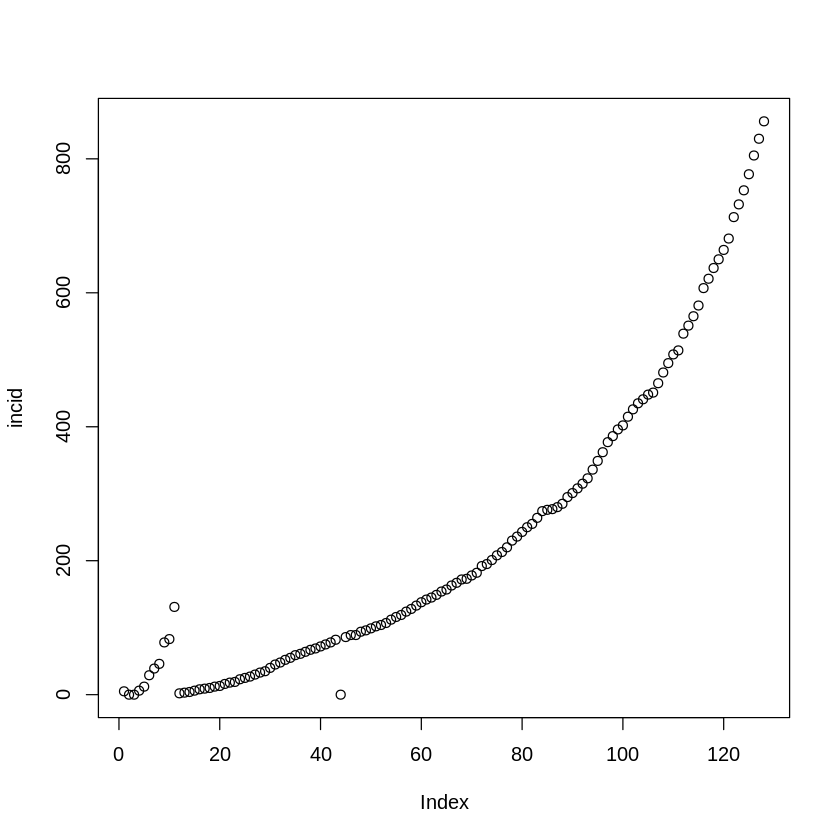

In [10]:
plot(incid)

In [11]:
est.R$GT

Discretized Generation Time distribution
mean: 8.752925 , sd: 11.63884 
  [1] 0.000000e+00 2.350397e-01 1.265864e-01 8.809366e-02 6.733417e-02
  [6] 5.410405e-02 4.485297e-02 3.798902e-02 3.268218e-02 2.845345e-02
 [11] 2.500525e-02 2.214207e-02 1.972970e-02 1.767262e-02 1.590087e-02
 [16] 1.436189e-02 1.301538e-02 1.182987e-02 1.078038e-02 9.846845e-03
 [21] 9.012912e-03 8.265129e-03 7.592323e-03 6.985126e-03 6.435626e-03
 [26] 5.937095e-03 5.483771e-03 5.070693e-03 4.693565e-03 4.348649e-03
 [31] 4.032680e-03 3.742791e-03 3.476456e-03 3.231442e-03 3.005768e-03
 [36] 2.797671e-03 2.605577e-03 2.428079e-03 2.263913e-03 2.111945e-03
 [41] 1.971150e-03 1.840605e-03 1.719472e-03 1.606996e-03 1.502486e-03
 [46] 1.405318e-03 1.314922e-03 1.230776e-03 1.152407e-03 1.079379e-03
 [51] 1.011295e-03 9.477898e-04 8.885289e-04 8.332045e-04 7.815337e-04
 [56] 7.332558e-04 6.881309e-04 6.459376e-04 6.064714e-04 5.695435e-04
 [61] 5.349795e-04 5.026179e-04 4.723090e-04 4.439145e-04 4.173059e-04
 [66]